In [ ]:
# default_exp core

# Core library

> Helper functions used throughout the lessons.

In [ ]:
# export
from nbdev.showdoc import *
import wget
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pandas.api.types import is_object_dtype, is_numeric_dtype
import seaborn as sns
import scipy
from scipy.cluster import hierarchy as hc
import matplotlib.pyplot as plt

## Datasets

In [ ]:
# exports
def get_dataset(dataset_name: str, path="../data/"):
    """
    Download datasets from Google Drive.
    """

    name_to_id = {
        "word2vec-google-news-300.pkl": "1dRwSXbFTcQbn8c3V24G92wFY4DXZ1SDt",
        "imdb.csv": "1wF0YEmQOwceJz2d6w4CfhBgydU87dPGl",
        "housing.csv": "1d7oOKdDmZFx8wf0c8OfuTW1FpUyJHABh",
        "housing_gmaps_data_raw.csv": "1R1RUHAXxzrIngRJMFwyp4vZRVICd-I6T",
        "housing_addresses.csv": "1mOK0uyRz5Zs-Qo7mVMlxwtb2xn1E6N9Q",
        "housing_merged.csv": "1bdYuBtIPrKiU-ut2MeSSsL47onPtZrRt",
        "housing_processed.csv": "12PxnWhPg_Pj0yx75vD22gwfdkkx80E6_",
        "churn.csv": "1-IO-JQr7tjQGIKZyo_SyupCpX2VNDQIf",
        "kaggle_housing_train.csv": "1BHiuZyMab7rPA8Rog29fIYhJmjvJLkVI",
        "kaggle_housing_test.csv": "1KSfBhIdFlejUWAnrfFl10c-rjA4VhgkT",
        "kaggle_titanic_train.csv": "1BHiuZyMab7rPA8Rog29fIYhJmjvJLkVI",
        "kaggle_titanic_test.csv": "1NFCDTBF4dM8rllv0fP3VnPmoRLmfdOEB",
        "fine_tuned.pth": "S3",
        "data_lm.pkl": "S3"
    }
    os.makedirs(path, exist_ok=True)
    gdrive_path = "https://docs.google.com/uc?export=download&id="
    s3_path = "https://dslectures.s3.eu-central-1.amazonaws.com/"
    
    if dataset_name in name_to_id:
        if os.path.exists(path + dataset_name):
            print(
                f"Dataset already exists at '{path + dataset_name}' and is not downloaded again."
            )
            return
        try:
            if name_to_id[dataset_name]=="S3":
                file_url = s3_path + dataset_name
            else:
                file_url = gdrive_path + name_to_id[dataset_name]
            wget.download(file_url, out=path)
        except Exception as e:
            print("Something went wrong during download. Try again.")
            raise e
        print(f"Download of {dataset_name} dataset complete.")
    else:
        raise KeyError("File not on Google Drive.")

### California Housing Prices
This dataset from Kaggle ([link](https://www.kaggle.com/camnugent/california-housing-prices)) is used in the second chapter of Aurélien Géron's recent book *Hands-On Machine learning with Scikit-Learn and TensorFlow*.

#### `housing.csv`
This dataset pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [ ]:
get_dataset("housing.csv")

Download of housing.csv dataset complete.


#### `housing_gmaps_data_raw.csv`
This dataset contains the raw outputs of the addresses associated with the coordinates in the `housing.csv` dataset as retrieved with the Google Maps API. 

In [ ]:
get_dataset("housing_gmaps_data_raw.csv")

Download of housing_gmaps_data_raw.csv dataset complete.


#### `housing_addresses.csv`
The `housing_addresses.csv` dataset is a cleaned subset of the `housing_gmaps_data_raw.csv` dataset.

In [ ]:
get_dataset("housing_addresses.csv")

Download of housing_addresses.csv dataset complete.


#### `housing_merged.csv`

The merge of `housing.csv` and `housing_addresses.csv` from lesson 2.

In [ ]:
get_dataset("housing_merged.csv")

Download of housing_merged.csv dataset complete.


#### `housing_processed.csv`

The processed version of `housing_merged.csv` with no missing values and categorical columns encoded numerically.

In [ ]:
get_dataset("housing_processed.csv")

Download of housing_processed.csv dataset complete.


### IMDB

#### `imdb.csv`
The IMDB dataset is available on Kaggle ([link](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)). This is a dataset for binary sentiment classification and provides a set of 25,000 highly polar movie reviews for training and 25,000 for testing.

In [ ]:
get_dataset("imdb.csv")

Download of imdb.csv dataset complete.


### Word2Vec embeddings

#### `word2vec-google-news-300.pkl`

Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained using a simple data-driven approach described in *Distributed Representations of Words and Phrases and their Compositionality*. This dataset is available from GENSIM ([link](https://github.com/RaRe-Technologies/gensim-data)).

In [ ]:
get_dataset("word2vec-google-news-300.pkl")

Download of word2vec-google-news-300.pkl dataset complete.


### Customer churn

[IBM's telecommunications dataset](https://www.kaggle.com/blastchar/telco-customer-churn) on customer churn. The dataset includes information about:

* Customers who left within the last month – the column is called `Churn`
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer (tenure), contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, whether they're a senior citizen or not, and if they have partners and dependents

In [ ]:
get_dataset("churn.csv")

Download of churn.csv dataset complete.


### Kaggle datasets

#### `kaggle_housing_train.csv` and `kaggle_housing_test.csv`

Train and test data for Kaggle's regression challenge (link [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)).

In [ ]:
get_dataset("kaggle_housing_train.csv")

Download of kaggle_housing_train.csv dataset complete.


In [ ]:
get_dataset("kaggle_housing_test.csv")

Download of kaggle_housing_test.csv dataset complete.


#### `kaggle_titanic_train.csv` and `kaggle_titanic_test.csv`

Train and test data for Kaggle's Titanic challenge (link [here](https://www.kaggle.com/c/titanic/overview)).

In [ ]:
get_dataset("kaggle_titanic_train.csv")

Download of kaggle_titanic_train.csv dataset complete.


In [ ]:
get_dataset("kaggle_titanic_test.csv")

Download of kaggle_titanic_test.csv dataset complete.


### fastai fine-tuned model

In [ ]:
get_dataset("fine_tuned.pth")

Download of fine_tuned.pth dataset complete.


## Metrics

In [ ]:
# exports
def rmse(y, yhat):
    """A utility function to calculate the Root Mean Square Error (RMSE).
    
    Args:
        y (array): Actual values for target.
        yhat (array): Predicted values for target.
        
    Returns:
        rmse (double): The RMSE.
    """
    return np.sqrt(mean_squared_error(y, yhat))

In [ ]:
y = np.array([2, 2, 3])
yhat = np.array([0, 2, 6])
rmse(y, yhat)

2.0816659994661326

## Data wrangling

In [ ]:
# exports
def convert_strings_to_categories(df):
    """A utility function to convert all string columns to Categorical data type."""
    for col in df.columns:
        if is_object_dtype(df[col]):
            df[col] = df[col].astype("category")

In [ ]:
df = pd.DataFrame(
    {"string_column": ["apple", "banana", "orange"], "numerical_column": [0, 2, 4]}
)
df.head()

,string_column,numerical_column
0,apple,0
1,banana,2
2,orange,4


In [ ]:
df.dtypes

string_column       object
numerical_column     int64
dtype: object

In [ ]:
convert_strings_to_categories(df)

In [ ]:
df.dtypes

string_column       category
numerical_column       int64
dtype: object

In [ ]:
df["string_column"].cat.categories

Index(['apple', 'banana', 'orange'], dtype='object')

In [ ]:
df["string_column"].cat.codes

0    0
1    1
2    2
dtype: int8

In [ ]:
# exports
def fill_missing_values_with_median(df):
    """Replaces missing values in numerical columns with the median."""
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            if pd.isnull(df[column]).sum():
                column_median = df[column].median()
                df[column].fillna(column_median, inplace=True)

In [ ]:
df = pd.DataFrame(
    [[np.nan, 2, 0], [3, 4, 1], [np.nan, np.nan, 5], [np.nan, 3, 4],],
    columns=list("ABC"),
)

df

,A,B,C
0,NaN,2.0,0
1,3.0,4.0,1
2,NaN,NaN,5
3,NaN,3.0,4


In [ ]:
fill_missing_values_with_median(df)

In [ ]:
df

,A,B,C
0,3.0,2.0,0
1,3.0,4.0,1
2,3.0,3.0,5
3,3.0,3.0,4


## Polynomial data

In [ ]:
# exports
def make_polynomial_data(weight, n_samples=100, seed=42):
    """
    Creates noisy polynomial data.
    
    Args:
        weight (array): polynomial weights in descending order
        n_samples (int): number of samples
        seed (int): random seed
    
    returns:
        x (array): x-values
        y (array): y-values
    """

    np.random.seed(seed)

    # generate random points on the x axis
    x = (0.5-np.random.rand(n_samples))*2
    
    # sort the array
    x = np.sort(x)
    
    # evalute polynomial with weight w at positions x
    y_true = np.polyval(weight, x)

    # add noise samples from the normal gaussian
    # distribution to the data.
    y = y_true + np.random.randn(n_samples)
    
    return x, y

In [ ]:
x, y = make_polynomial_data(np.array([10, 0, 0]))

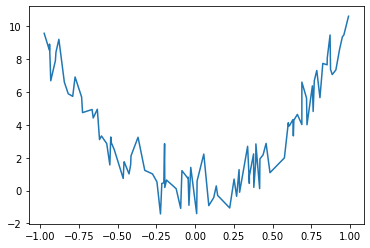

In [ ]:
plt.plot(x, y)

In [ ]:
# exports

class PolynomialRegressor:
    """
    Scikit-like interface to fit polynomials.
    """
    def __init__(self, degree=0, w_hat=None):
        """
        Initialize polynomial fitter.
        
        args:
            degree (int): degree of polynomial to fit, default: 0.
            w_hat (array): polynomial weights, default: None.
        
        """
        self.degree = degree
        self.w_hat = w_hat

    def fit(self, x, y):
        """Fit polynomial to x,y data."""
        self.w_hat = np.polyfit(x, y, self.degree)
        return self
        
    def predict(self, x):
        """Predict y with fitted polynomial."""
        if self.w_hat is not None:
            return np.polyval(self.w_hat, x)
        else:
            raise ValueError('You need to first fit the model.')
    
    def evaluate(self, x, y):
        """Evaluate RMSE score of y and predictions for y."""
        if self.w_hat is not None:
            y_hat = np.polyval(self.w_hat, x)
            return rmse(y, y_hat)
        else:
            raise ValueError('You need to first fit the model.')
            
    def get_params(self, **kwargs):
        return {'w_hat': self.w_hat,
                'degree': self.degree}
            

In [ ]:
pf = PolynomialRegressor(degree=2)
pf.fit(x, y)
x_lin = np.linspace(-1, 1, 100)
y_hat =pf.predict(x_lin)

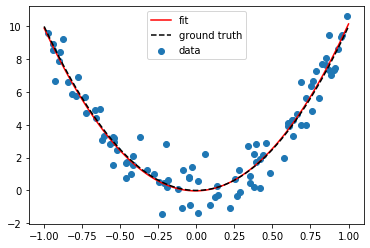

In [ ]:
plt.scatter(x, y, label='data')
plt.plot(x_lin, y_hat, c='r', label='fit')
plt.plot(x_lin, np.polyval([10, 0, 0], x_lin), linestyle='--', c='black', label='ground truth')
plt.legend(loc='best')
plt.show()

In [ ]:
print(f"RMSE: {pf.evaluate(x, y):.3f}")

RMSE: 0.882


In [ ]:
# exports
def display_large(df):
    """Displays up to 1000 columns and rows of pandas.DataFrame or pandas.Series objects."""
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [ ]:
data = [{"col_" + str(k): v for k, v in enumerate(range(100))}]
df = pd.DataFrame(data)

In [ ]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99
0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99


In [ ]:
display_large(df)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99


In [ ]:
# exports
def rf_feature_importance(fitted_model, df):
    "Creates a pandas.Dataframe of a Random Forest's feature importance per column."
    return pd.DataFrame(
        {"Column": df.columns, "Importance": fitted_model.feature_importances_}
    ).sort_values("Importance", ascending=False)

## Data visualisation

In [ ]:
# exports
def plot_feature_importance(feature_importance):
    fig, ax = plt.subplots(figsize=(12,8))
    return sns.barplot(y="Column", x="Importance", data=feature_importance, color="b")

In [ ]:
# exports
def plot_dendogram(X):
    """Plots a dendogram to see which features are related."""
    # calculate correlation coefficient
    corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
    # convert to distance matrix
    corr_condensed = hc.distance.squareform(1 - corr)
    # perform clustering
    z = hc.linkage(corr_condensed, method="average")
    # plot dendogram
    fig = plt.figure(figsize=(16, 10))
    dendrogram = hc.dendrogram(
        z, labels=X.columns, orientation="left", leaf_font_size=16
    )
    plt.show()

In [ ]:
# exports
def plot_fitting_graph(x, metric_train, metric_valid, metric_name='metric', xlabel='x', yscale='linear'):
    """Plot fitting graph for train and validation metrics."""
    plt.plot(x, metric_train, label='train')
    plt.plot(x, metric_valid, label='valid')
    plt.yscale(yscale)
    plt.title('Fitting graph')
    plt.ylabel(metric_name)
    plt.xlabel(xlabel)
    plt.legend(loc='best')
    plt.grid(True)

In [ ]:
# exports
def plot_classifier_boundaries(X, y, clf):
    """
    Given features X and labels y along with classifier, plot decision boundaries in two dimensions.
    
    Args:
        X: feature array of shape (n_samples, n_features)
        y: label array of shape (n_samples)
    """
    
    h = .02  # step size in the mesh

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=1)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())